# **Problem Statement** 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A **US bike-sharing provider BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
## Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


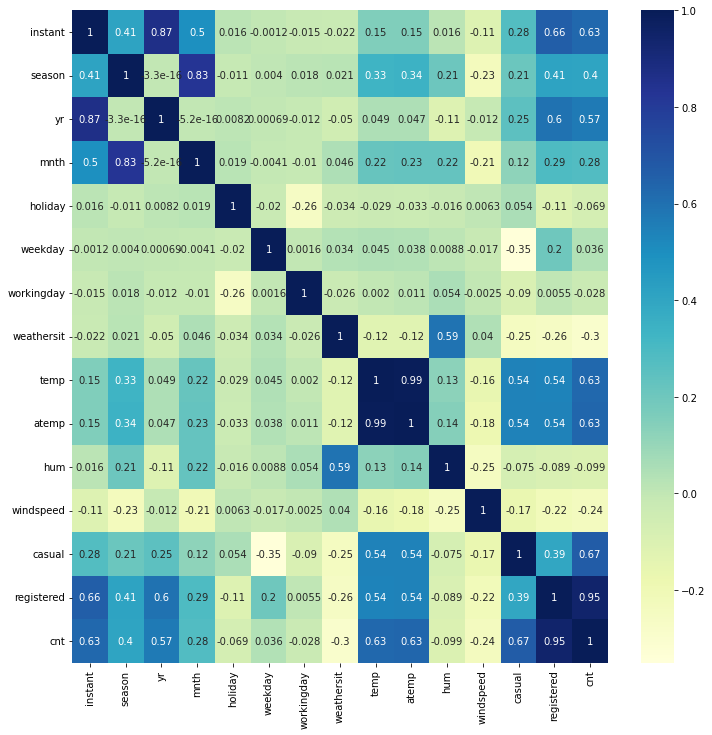

In [7]:
## Visualizing the correlation between the variables
plt.figure(figsize=[12,12])
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [8]:
## Dropping those columns which are highly correlated with each other

bike = bike.drop(['dteday','instant','casual','registered','atemp'], axis=1)
bike.shape

(730, 11)

In [9]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [10]:
# Replacing and cleaning the data 

bike.season = bike.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike.mnth = bike.mnth.replace({1:'jan', 2:'feb',3:'march',4:'apr', 5:'may',6:'jun',
                               7:'july',8:'aug',9:'sept',10:'oct',11:'nov', 12:'dec'})

bike.weekday = bike.weekday.replace({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs',5:'Fri', 6:'Sat'})

bike.weathersit = bike.weathersit.replace({1:'Clear', 2:'Misty', 3:'Light Rain', 4:'Heavy Rain'})

bike.yr = bike.yr.replace({0:2018, 1:2019})

bike.temp = round(bike.temp,2)

bike.hum = round(bike.hum,2)

bike.windspeed = round(bike.windspeed,2)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Mon,1,Misty,14.11,80.58,10.75,985
1,spring,2018,jan,0,Tues,1,Misty,14.90,69.61,16.65,801
2,spring,2018,jan,0,Wed,1,Clear,8.05,43.73,16.64,1349
3,spring,2018,jan,0,Thurs,1,Clear,8.20,59.04,10.74,1562
4,spring,2018,jan,0,Fri,1,Clear,9.31,43.70,12.52,1600


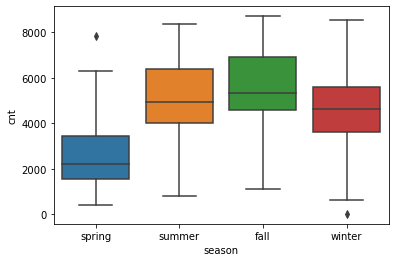

In [12]:
# we want to know that in which season we have the most cnt's

sns.boxplot(x = bike.season, y= bike.cnt)
plt.show()

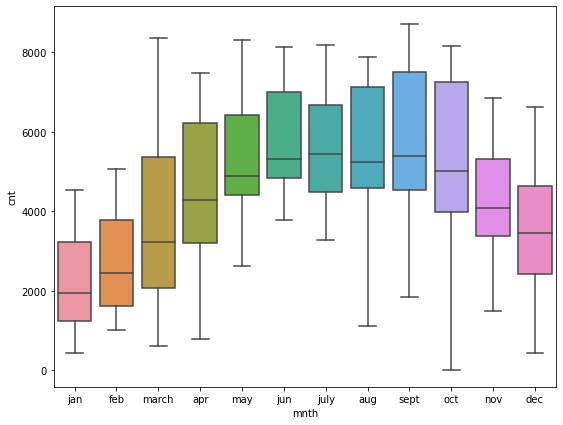

In [13]:
# we want to know that in which month we have the most cnt's
plt.figure(figsize=[9,7])
sns.boxplot(x = bike.mnth, y= bike.cnt)
plt.show()

In [14]:
bike.workingday.value_counts(normalize=True)*100

## this shows that the 69% of the days are the working days

1    69.041096
0    30.958904
Name: workingday, dtype: float64

In [15]:
bike.weathersit.value_counts(normalize=True)*100


Clear         63.424658
Misty         33.698630
Light Rain     2.876712
Name: weathersit, dtype: float64

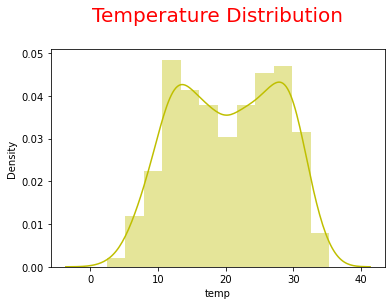

In [16]:
sns.distplot(bike.temp, color='y')
plt.title("Temperature Distribution\n", color='r', size=20, weight=100)
plt.show()

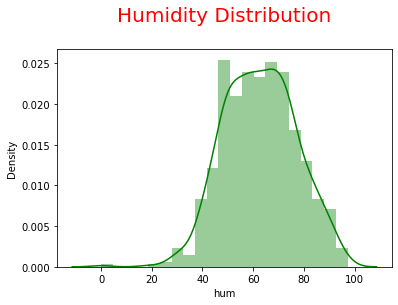

In [17]:
sns.distplot(bike.hum, color='g')
plt.title("Humidity Distribution\n", color='r', size=20, weight=100)
plt.show()

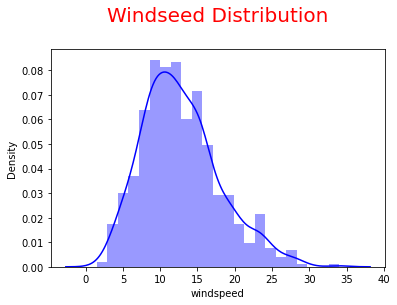

In [18]:
sns.distplot(bike.windspeed, color='b')
plt.title("Windseed Distribution\n", color='r', size=20, weight=100)
plt.show()

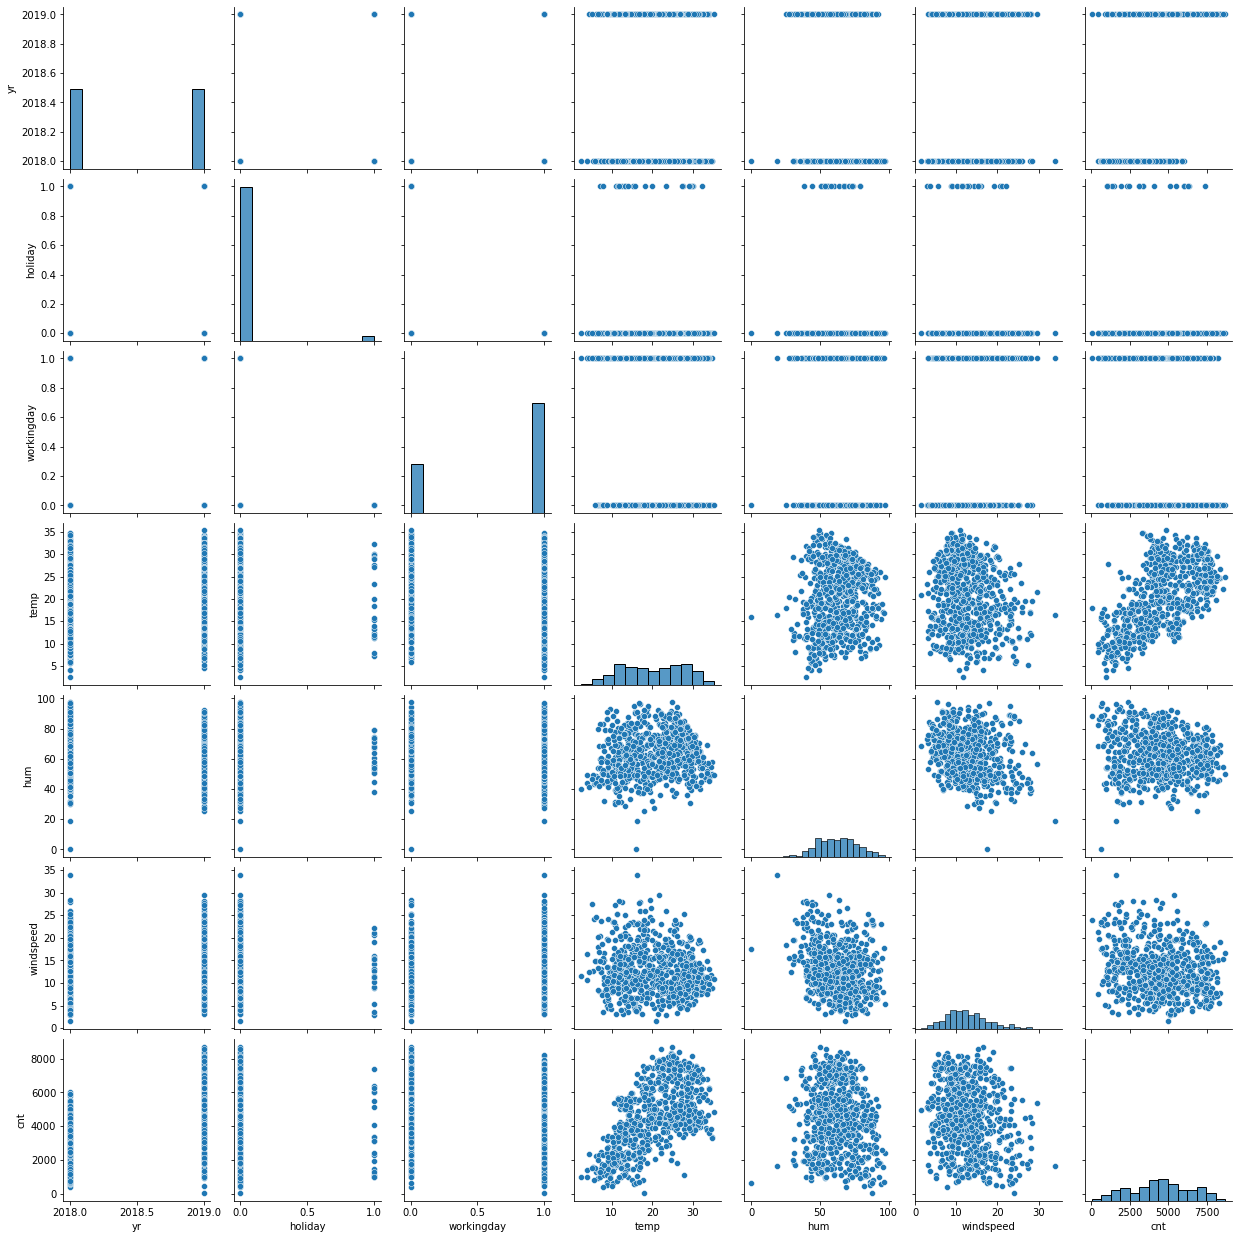

In [19]:
sns.pairplot(bike)
plt.show()

## Getting Dummy datas for the following categorical variables
1. Season
2. mnth
3. weekday
4. weathersit

In [20]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Mon,1,Misty,14.11,80.58,10.75,985
1,spring,2018,jan,0,Tues,1,Misty,14.90,69.61,16.65,801
2,spring,2018,jan,0,Wed,1,Clear,8.05,43.73,16.64,1349
3,spring,2018,jan,0,Thurs,1,Clear,8.20,59.04,10.74,1562
4,spring,2018,jan,0,Fri,1,Clear,9.31,43.70,12.52,1600


In [21]:
# Getting dummies for the season variable
sta = pd.get_dummies(bike.season, drop_first=True)
sta.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
# Getting dummies for mnth variable
sta2 = pd.get_dummies(bike.mnth, drop_first=True)
sta2.head()

,aug,dec,feb,jan,july,jun,march,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [23]:
# Getting dummies for the weekday variable
sta3 = pd.get_dummies(bike.weekday, drop_first=True)
sta3.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [24]:
# Getting dummies for the weathersit variable
sta4 = pd.get_dummies(bike.weathersit, drop_first=True)
sta4.head()

,Light Rain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [25]:
# Concating all the dataframes 
bike = pd.concat([bike, sta, sta2, sta3, sta4], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Rain,Misty
0,spring,2018,jan,0,Mon,1,Misty,14.11,80.58,10.75,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,jan,0,Tues,1,Misty,14.90,69.61,16.65,...,0,0,0,0,0,0,1,0,0,1
2,spring,2018,jan,0,Wed,1,Clear,8.05,43.73,16.64,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,Thurs,1,Clear,8.20,59.04,10.74,...,0,0,0,0,0,1,0,0,0,0
4,spring,2018,jan,0,Fri,1,Clear,9.31,43.70,12.52,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Dropping those variables for which we derived the dummy variables
bike = bike.drop(['season','mnth','weekday', 'weathersit'], axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Rain,Misty
0,2018,0,1,14.11,80.58,10.75,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,1,14.90,69.61,16.65,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.20,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.31,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Splitting the data into train and test 

df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [28]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'jun',
       'march', 'may', 'nov', 'oct', 'sept', 'Mon', 'Sat', 'Sun', 'Thurs',
       'Tues', 'Wed', 'Light Rain', 'Misty'],
      dtype='object')

In [29]:
## We are fitting and transforming the train data using minmaxscaler

num_vars = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Rain,Misty
653,2019,0,1,0.509875,0.575330,0.300930,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,2019,0,1,0.815254,0.725680,0.264678,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,2019,0,0,0.442419,0.640148,0.255374,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,2019,0,1,0.245214,0.498042,0.663138,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,2019,0,0,0.395624,0.504534,0.188643,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Rain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.711765,0.537300,0.650378,0.320866,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225801,0.145885,0.169770,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.339866,0.538644,0.199230,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,0.540565,0.653751,0.296760,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.735339,0.754818,0.414501,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

### Taking RFE 1st with 20 variables

In [31]:
df_train.shape, df_test.shape

((510, 29), (219, 29))

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [34]:
rfe = RFE(lm,20)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('jun', False, 8),
 ('march', False, 9),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sept', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 7),
 ('Tues', False, 2),
 ('Wed', False, 5),
 ('Light Rain', True, 1),
 ('Misty', True, 1)]

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'dec', 'feb', 'jan', 'july', 'may', 'nov', 'sept',
       'Sat', 'Sun', 'Light Rain', 'Misty'],
      dtype='object')

In [37]:
# Fitting model with Rfe support variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          9.60e-186
Time:                        17:49:23   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -465.6654     16.298    -28.572      0.000    -497.688    -433.643
yr             0.2310      0.008     28.609      0.000       0.215       0.247
holiday       -0.1347      0.065     -2.062      0.040      -0.263      -0.006
workingday    -0.0570      0.071     -0.806      0.420      -0.196       0.082
temp           0.4517      0.039     11.669      0.000       0.376       0.528
hum           -0.1591      0.038     -4.180      0.000      -0.234      -0.084
windspeed     -0.1870      0.026     -7.268      0.000      -0.237      -0.136
spring        -0.0568      0.022     -2.564      0.011      -0.100      -0.013
summer         0.0270      0.017      1.575      0.116      -0.007       0.061
winter         0.0999      0.018      5.557      0.000       0.065       0.135
dec           -0.0498      0.018     -2.721      0.007      -0.086      -0.014
feb           -0.0373      0.022     -1.724      0.085      -0.080       0.005
jan           -0.0649      0.021     -3.024      0.003      -0.107      -0.023
july          -0.0544      0.018     -3.000      0.003      -0.090      -0.019
may            0.0248      0.018      1.418      0.157      -0.010       0.059
nov           -0.0454      0.019     -2.387      0.017      -0.083      -0.008
sept           0.0725      0.017      4.309      0.000       0.039       0.106
Sat           -0.0407      0.070     -0.578      0.564      -0.179       0.098
Sun           -0.0345      0.070     -0.490      0.624      -0.173       0.104
Light Rain    -0.2498      0.026     -9.474      0.000      -0.302      -0.198
Misty         -0.0588      0.010     -5.600      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.592   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.878
Skew:                          -0.798   Prob(JB):                     3.24e-45
Kurtosis:                       5.663   Cond. No.                     8.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Checking VIF's for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,17030762.11
3,workingday,65.70
18,Sun,37.58
17,Sat,35.87
2,holiday,6.80
7,spring,5.80
4,temp,4.89
9,winter,3.87
8,summer,3.49
12,jan,2.38


**As we are getting many insignificant variables and dropping each of them would be hectic so opting for 10 variables with RFE**

## Taking RFE 2nd with 12 variables

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [40]:
rfe2 = RFE(lm,12)
rfe2 = rfe2.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns, rfe2.support_, rfe2.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('jun', False, 16),
 ('march', False, 17),
 ('may', False, 9),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sept', True, 1),
 ('Mon', False, 11),
 ('Sat', False, 7),
 ('Sun', False, 8),
 ('Thurs', False, 15),
 ('Tues', False, 10),
 ('Wed', False, 13),
 ('Light Rain', True, 1),
 ('Misty', True, 1)]

In [42]:
col = X_train.columns[rfe2.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'july', 'sept', 'Light Rain', 'Misty'],
      dtype='object')

In [43]:
X_train_rfe2 = X_train[col]
X_train_rfe2_new = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train, X_train_rfe2_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          1.72e-190
Time:                        17:49:23   Log-Likelihood:                 509.46
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -462.5214     16.405    -28.193      0.000    -494.754    -430.289
yr             0.2293      0.008     28.217      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.810      0.000      -0.148      -0.047
temp           0.5301      0.034     15.738      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1820      0.026     -7.067      0.000      -0.233      -0.131
spring        -0.0563      0.021     -2.695      0.007      -0.097      -0.015
summer         0.0519      0.015      3.457      0.001       0.022       0.081
winter         0.0987      0.017      5.718      0.000       0.065       0.133
july          -0.0575      0.018     -3.139      0.002      -0.094      -0.022
sept           0.0830      0.017      4.960      0.000       0.050       0.116
Light Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Misty         -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.555   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.565
Skew:                          -0.610   Prob(JB):                     2.70e-29
Kurtosis:                       5.169   Cond. No.                     8.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2_new.values,i) for i in range(X_train_rfe2_new.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,16845392.58
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
12,Misty,1.56
9,july,1.48
10,sept,1.30
11,Light Rain,1.24


**Here, "spring" has high VIF value i.e., 5.02 so we will drop this**

In [45]:
X_train_rfe2_new2 = X_train_rfe2_new.drop(['spring'], axis=1)

In [46]:
lm = sm.OLS(y_train, X_train_rfe2_new2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          3.95e-190
Time:                        17:49:23   Log-Likelihood:                 505.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -459.7451     16.476    -27.904      0.000    -492.116    -427.375
yr             0.2279      0.008     27.927      0.000       0.212       0.244
holiday       -0.0994      0.026     -3.866      0.000      -0.150      -0.049
temp           0.5978      0.023     26.504      0.000       0.554       0.642
hum           -0.1826      0.038     -4.832      0.000      -0.257      -0.108
windspeed     -0.1893      0.026     -7.345      0.000      -0.240      -0.139
summer         0.0804      0.011      7.458      0.000       0.059       0.102
winter         0.1357      0.011     12.869      0.000       0.115       0.156
july          -0.0481      0.018     -2.658      0.008      -0.084      -0.013
sept           0.0959      0.016      5.944      0.000       0.064       0.128
Light Rain    -0.2331      0.026     -8.808      0.000      -0.285      -0.181
Misty         -0.0517      0.011     -4.904      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       52.343   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.880
Skew:                          -0.598   Prob(JB):                     1.02e-23
Kurtosis:                       4.885   Cond. No.                     8.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2_new2.values,i) for i in range(X_train_rfe2_new2.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,16778985.66
4,hum,1.87
3,temp,1.60
11,Misty,1.55
8,july,1.43
6,summer,1.33
7,winter,1.29
10,Light Rain,1.24
9,sept,1.19
5,windspeed,1.18


In [48]:
y_train_pred = lm.predict(X_train_rfe2_new2)

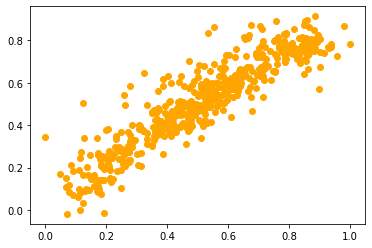

In [49]:
plt.scatter(y_train, y_train_pred,color='orange')
plt.show()

## Residual Analysis for 3rd REF with 6 Variables

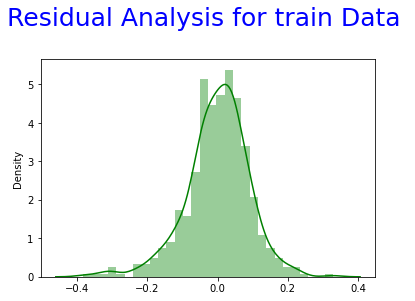

In [50]:
# Residual Analysis 

y_train_pred = lm.predict(X_train_rfe2_new2)
res = y_train - y_train_pred
sns.distplot(res, color='g', bins=30)
plt.title("Residual Analysis for train Data \n", size=25, color='b')
plt.show()

In [63]:
# R^2 for train data which we looked at summary which is above here
r_train = r2_score(y_true=y_train, y_pred= y_train_pred)

In [52]:
mean_squared_error(y_true=y_train, y_pred= y_train_pred)

0.008056677040760294

# Making Predictions for test data 

In [53]:
# Scling the test data using transform
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,Mon,Sat,Sun,Thurs,Tues,Wed,Light Rain,Misty
184,2018,1,0,0.831662,0.657358,0.084376,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,2019,0,1,0.901246,0.610161,0.153994,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,2018,0,0,0.512002,0.837696,0.334296,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,2018,0,1,0.881495,0.437139,0.339750,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,2018,0,0,0.817381,0.314303,0.537376,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
X_test = X_test[X_train_rfe2.columns]   # Here we didn't took X_train_rfe3_new because it already haave constant
X_test_new = sm.add_constant(X_test)

In [56]:
X_test_new = X_test_new.drop(['spring'], axis=1)
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'july', 'sept', 'Light Rain', 'Misty'],
      dtype='object')

In [57]:
X_train_rfe2_new2.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'july', 'sept', 'Light Rain', 'Misty'],
      dtype='object')

In [58]:
# Predicting the y values for the given X 
y_test_pred = lm.predict(X_test_new)

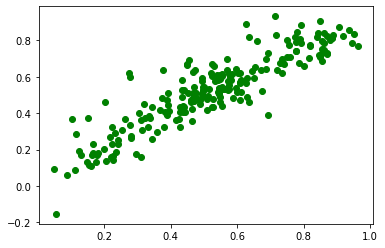

In [59]:
# Plotting the data using scatter plot 
plt.scatter(y_test, y_test_pred, color='g')
plt.show()

In [62]:
# Checking R^2 squared for the test set
r_test = r2_score(y_true= y_test, y_pred=y_test_pred)

In [61]:
# Checking mean_squared_error for the test set
mean_squared_error(y_true= y_test, y_pred=y_test_pred)

0.009291699427401738

In [65]:
print("Train R2 score:-", r_train)
print("Test R2 score:-", r_test)

Train R2 score:- 0.8399640598342224
Test R2 score:- 0.8043680107936788


# Answers asked by the client:- 

- **Q1.** Which variables are significant in predicting the demand for shared bikes? 
- **Ans1:-** The KPI's for the given dataset are:- 
  **['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer','winter', 'july', 'sept', 'Light Rain', 'Misty']**
  
  
- **Q2:-** How well those variables describe the bike demands? 
- **Ans2:-** These variables are able to describe the demands properly and the model with the help of these variables gives 84% of accuracy which is great in the industry 

# Summary:- 

## Train set:-

- R2 Score:- 0.84
- Mean Squared Error:- 0.00805


## Test set:- 

- R2 Score:- 0.80
- Mean Squared Error:- 0.0092


**PS:- The R2 value of both train and test set is very close to each other so we can say that our model is working efficiently.**